# Supplementary Figure 2

---

<br>

## Import libraries

In [1]:
import pysam
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

## Settings for saving figures as pdf

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Set environmental constants

In [3]:
# Set path where files are stored
path = '/Volumes/elegans/rna_sequencing'

<br>

# Panel b: Measured length of 5’ and 3’ soft-clips

In [4]:
SC3_length = []
SC5_length = []
aln_length = []
names = []
orientation = []

runs = ['SSP_1', 'SSP_2', 'SSP_3']

for ID in runs:

    input_file = f'{path}/{ID}/{ID}-transcriptome_sorted.bam'

    with pysam.AlignmentFile(input_file,'rb') as alignments:
    
        for read in alignments:

            if not read.is_unmapped and not read.is_supplementary and read.seq is not None:

                name = read.query_name
                aln = read.query_alignment_length
                start = read.query_alignment_start
                end = read.query_length - read.query_alignment_end

                names.append(name)
                aln_length.append(aln)
                SC5_length.append(start)
                SC3_length.append(end)
                
                origin = 'antisense' if read.is_reverse else 'sense'
                orientation.append(origin)

extremities = pd.DataFrame(dict(read=names, softclip5=SC5_length, softclip3=SC3_length, 
                                alignment=aln_length, read_orientation=orientation))

In [5]:
extremities

,read,softclip5,softclip3,alignment,read_orientation
0,9291b2e1-006e-4416-94d1-47443f44cc58,976,466,897,antisense
1,6280d610-7c3f-426a-9a77-7ee663a1097d,1128,330,1077,antisense
2,27a122f8-6662-4831-ba32-8f25f83ce737,416,56,709,antisense
3,694b4446-a948-47ae-9b6d-9b6bbb78f9f9,857,33,645,sense
4,36419d20-5b58-4f0b-869b-5215f70cc202,234,48,769,antisense
...,...,...,...,...,...
1337399,4c9cc5e0-e976-47de-aef5-0f7fea3bd5f8,524,43,689,antisense
1337400,971a8082-4e9a-4584-81cb-d299ed45fa12,300,30,524,antisense
1337401,6f8d97ed-768e-4ab1-b4a0-c6136eeaca7a,135,41,239,antisense
1337402,ec62e1ff-174e-4026-8492-5b5b1b71ba84,370,60,460,antisense


In [6]:
print('Y-top adapter: ', len('GGCGTCTGCTTGGGTGTTTAACCTTTTTTTTTTAATGTACTTCGTTCAGTTACGTATTGCT'), 'nt')      # y-top 61
print('Y-bottom adapter: ', len('GCAATACGTAACTGAACGAAGT'), 'nt')                                          # y-bottom 22 
print('SSP adapter: ', len('TTTCTGTTGGTGCTGATATTGCTGGG'), 'nt')                                           # SSP 26
print('VNP adapter: ', len('AAAAAAAAAAGAAGATAGAGCGACAGGC'), 'nt')                                         # VNP 28
print('SL1 adapter: ', len('GGTTTAATTACCCAAGTTTGAG'), 'nt')                                               # SL1 22

Y-top adapter:  61 nt
Y-bottom adapter:  22 nt
SSP adapter:  26 nt
VNP adapter:  28 nt
SL1 adapter:  22 nt


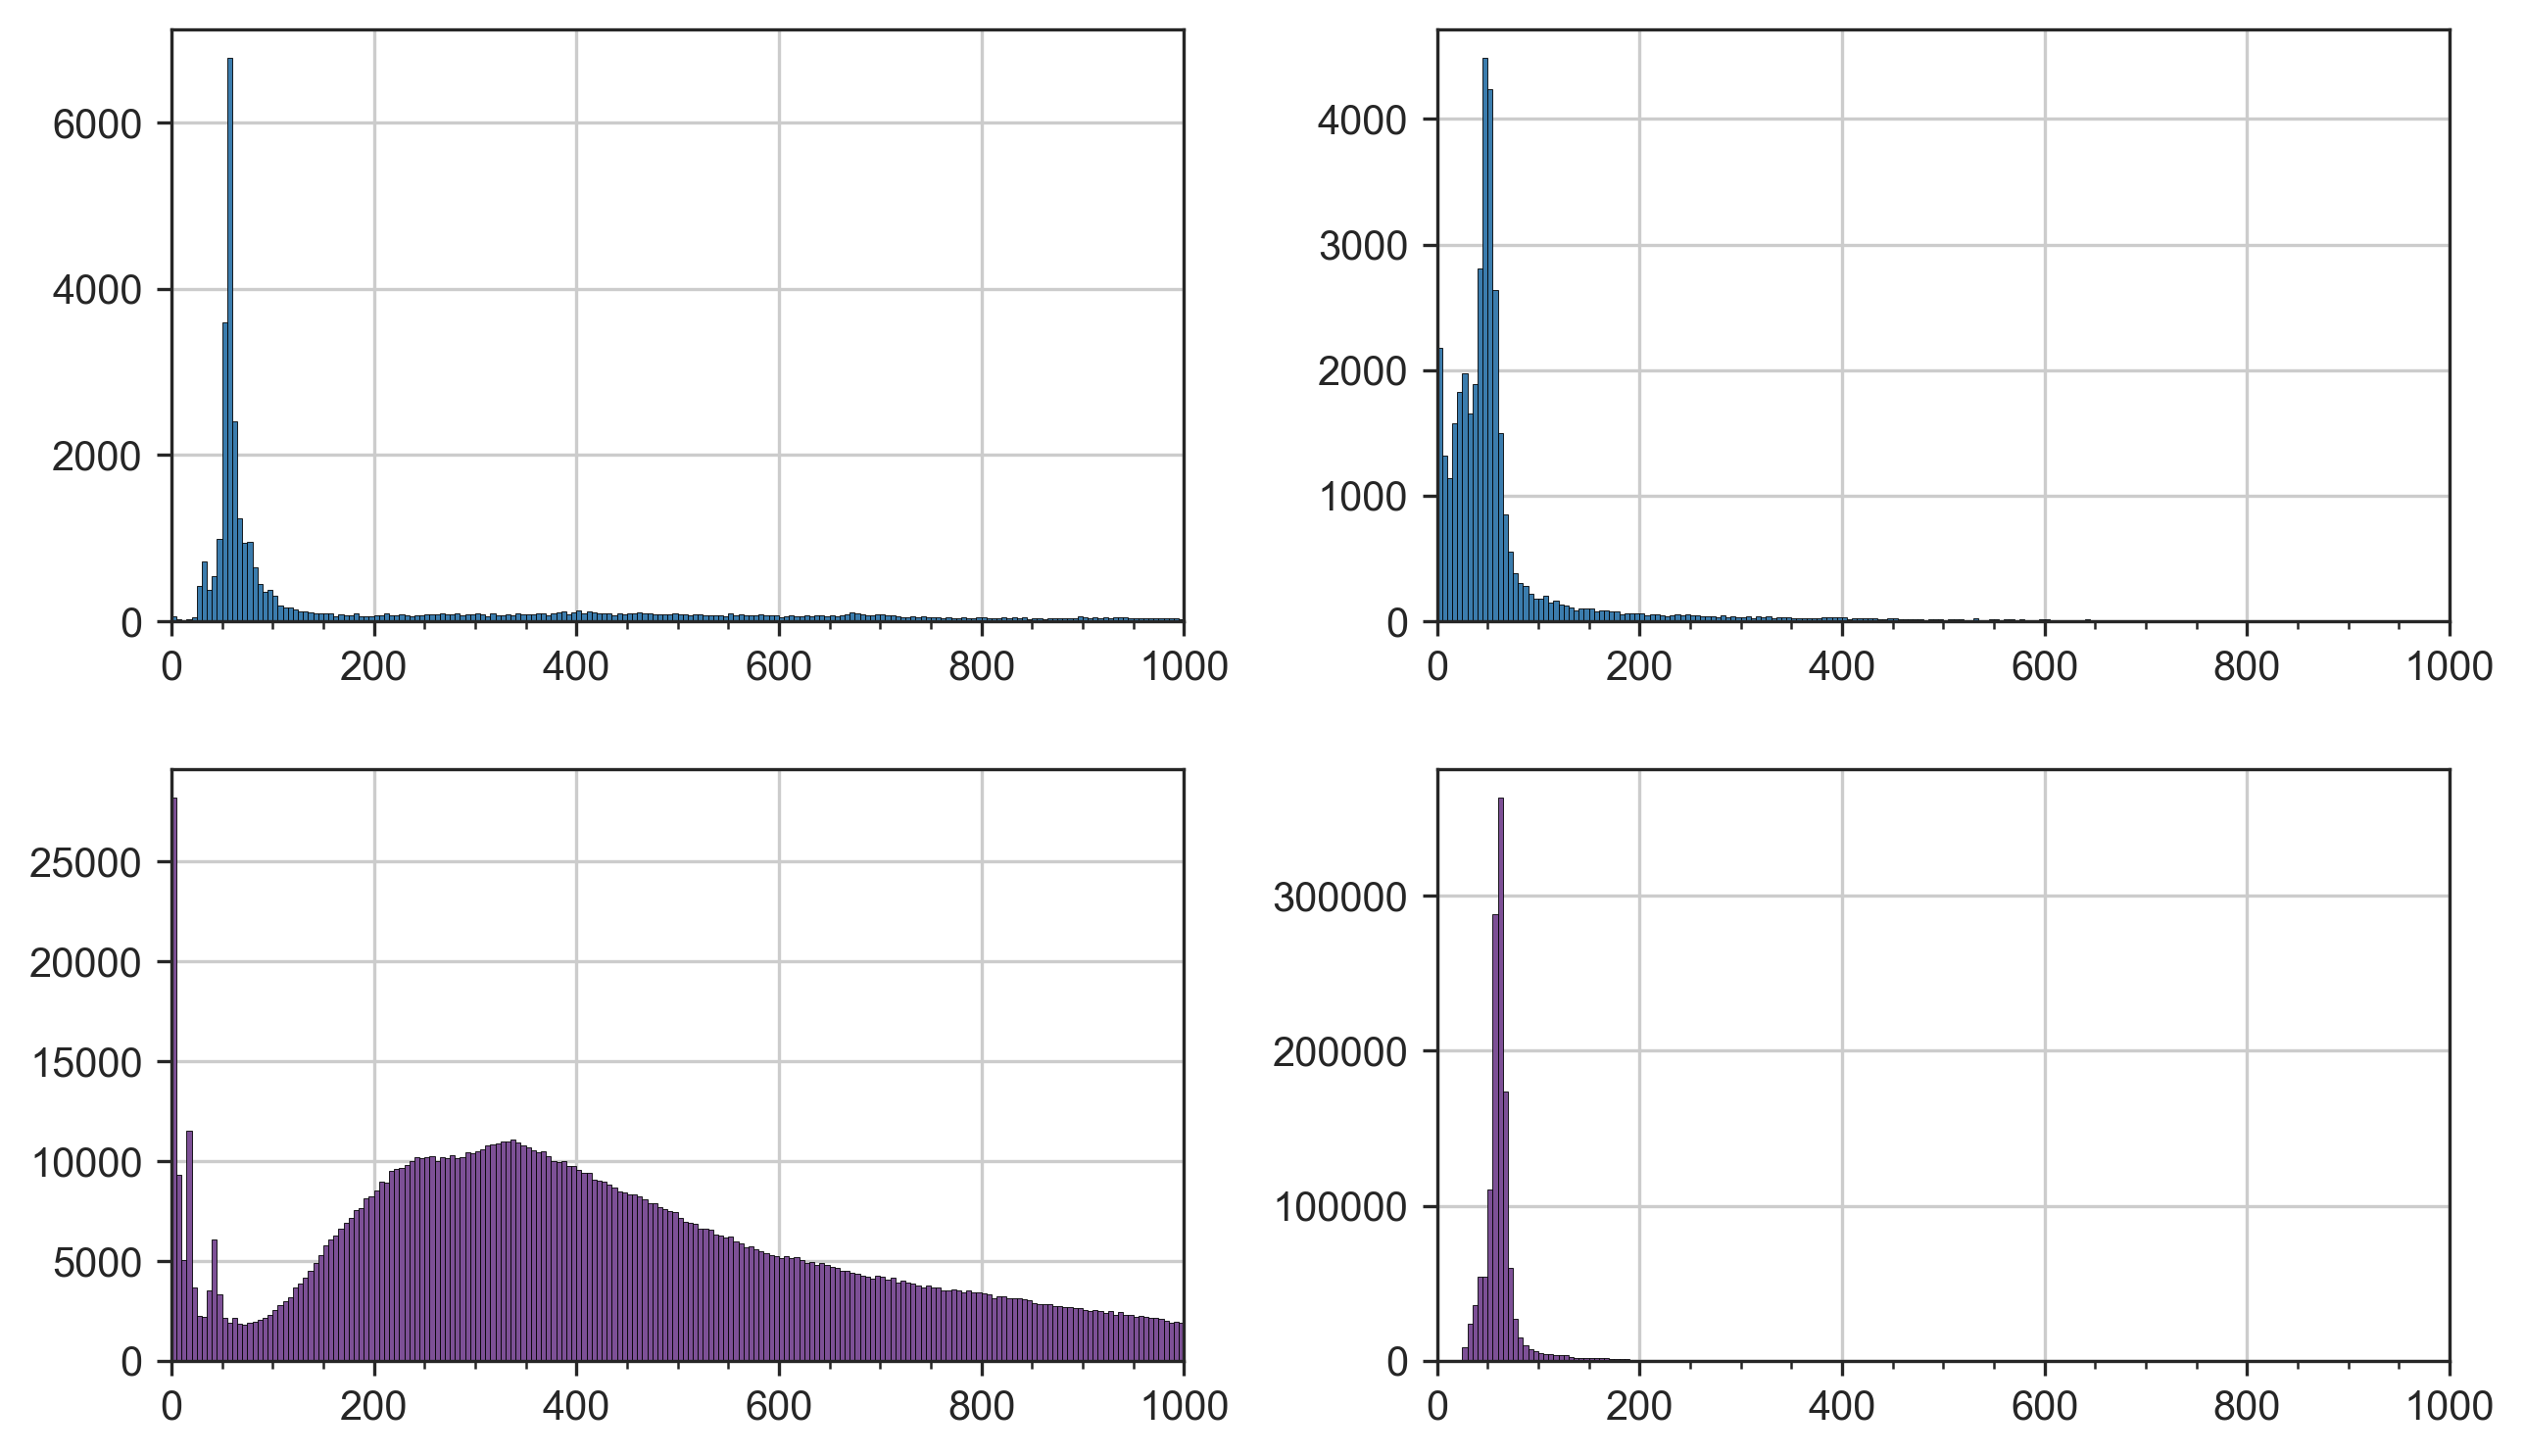

In [7]:
%matplotlib inline

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6), nrows=2, ncols=2, sharex=False, dpi=300)

# ---- sense ------ 
sense = extremities[extremities['read_orientation']=='sense']
# 5' softclip
sense['softclip5'].hist(bins=[i for i in range(0, 1010, 5)], ax=ax[0,0], color='#3b7cad', edgecolor='k', linewidth=0.2)
# 3' soft-clip
sense['softclip3'].hist(bins=[i for i in range(0, 1010, 5)], ax=ax[0,1], color='#3b7cad', edgecolor='k', linewidth=0.2)

# ---- antisense ------
antisense = extremities[extremities['read_orientation']=='antisense']
# 5' softclip
antisense['softclip5'].hist(bins=[i for i in range(0, 1010, 5)], ax=ax[1,0], color='#7d5096', edgecolor='k', linewidth=0.2)
# 3' soft-clip
antisense['softclip3'].hist(bins=[i for i in range(0, 1010, 5)], ax=ax[1,1], color='#7d5096', edgecolor='k', linewidth=0.2)


for a in fig.axes:
    a.set_xlim(0, 1000)
    a.xaxis.set_major_locator(MultipleLocator(200))
    a.xaxis.set_minor_locator(MultipleLocator(50))

plt.subplots_adjust(hspace=0.25, wspace=0.25)

plt.savefig('SupFig2.b-softclips_length.pdf', dpi=800, bbox_inches='tight')

<font size="4">**Supplementary Figure 2.b:**<br></font>
Size distribution of observed soft-clips separated by read strands. 5’ soft clip of antisense strand reads are in majority much larger than expected.